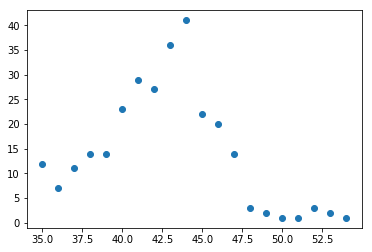

In [2]:
import numpy as np
import pandas as pd
import scipy.optimize as optimization
import matplotlib.pyplot as plt

filename = '../data/110_1098.txt'

channel = np.linspace(0,255, num=256)
values = np.loadtxt(filename)



vfunc = np.vectorize(lambda t: 1 if t == 0 else t)

values = vfunc(values)

plotFrom = 35
plotTo = 55
plt.scatter(channel[plotFrom:plotTo], values[plotFrom:plotTo])

[ 4.27493156e+01  1.70415034e+00  1.38186053e+02  1.81729804e+02
 -9.14550938e-02] [1.89793677e-01 1.19523248e-01 1.06092154e+01 5.17766316e+01
 8.93394064e-03]


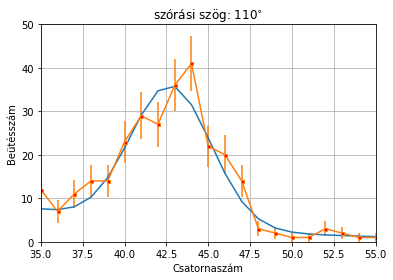

In [86]:
error = np.sqrt(values)

startVal = 25
endVal = 60

def gauss(x, m, s, A, bA, bb):
    return A/(np.sqrt(2*np.pi)*s)*np.exp(-((x-m)/(2*s))**2) + bA*np.exp(bb*x)

x0 = np.array([42.,3., 230., 3300., -.13])

params, cov = optimization.curve_fit(gauss, channel[startVal:endVal], values[startVal:endVal],
                                     x0, error[startVal:endVal])
perr = np.sqrt(np.diag(cov))

plt.plot(channel, gauss(channel, *params))
plt.errorbar(channel, values, error, marker='s', mfc='red', ms=3)
plt.xlim(plotFrom,plotTo)
plt.ylim(0,50)
plt.title('szórási szög: 110$^{\circ}$')
plt.xlabel('Csatornaszám')
plt.ylabel('Beütésszám')
plt.grid(True)

print(params, perr)
    
outFile = open('../gaussfits/withbackground/statictical_error.dat', 'ab')
np.savetxt(outFile, (startVal, endVal))
np.savetxt(outFile, (params, perr))

In [97]:
csucsok = np.array([4.274976260782730719e+01, 4.276857487195205465e+01, 4.278052246128969927e+01, 4.279210922186936727e+01,
           4.280761992952643169e+01, 4.280565160685441128e+01, 4.282906199597827168e+01, 4.283998244432110170e+01,
           4.285193291584820940e+01, 4.292090241042046017e+01, 4.292337244832555143e+01, 4.280714582243122379e+01, 
           4.280874252188890239e+01, 4.281027650812995233e+01, 4.281170986011348134e+01, 4.281298714022638308e+01,
           4.280465991981132134e+01, 4.279664779242730077e+01, 4.278295857370479638e+01, 4.278612651819359058e+01,
           4.281152154849162628e+01, 4.287084624072207362e+01, 4.274931557483418487e+01])

print(np.mean(csucsok),np.var(csucsok))

terulet = np.array([
    1.381072639440147327e+02,
    1.388525417178969406e+02,
    1.394136929909272737e+02,
    1.399011926747285486e+02,
    1.405045913696178275e+02,
    1.404640271417649728e+02,
    1.405159044646415225e+02,
    1.404363153905637489e+02,
    1.401823905734692630e+02,
    1.382864643048778817e+02,
    1.382051819902890486e+02,
    1.400420955478263068e+02,
    1.395575054400656825e+02,
    1.390497987581607049e+02,
    1.385414278189774961e+02,
    1.380426024496971138e+02,
    1.407419802370764899e+02,
    1.427399486865017479e+02,
    1.456090899574800517e+02,
    1.450265777431741867e+02,
    1.407054729463812919e+02,
    1.549863529781807472e+02,
    1.381860531770972216e+02
])

szoras = np.array([
    1.703331114116107603,
1.708562148521870494,
1.712627467501521838,
1.715977629965398377,
1.719814375933183204,
1.719672639131246905,
1.717094041605591315,
1.714880334852329824,
1.710898447801005196,
1.684342328217968143,
1.683311351964344116,
1.715461214361300835,
1.710628837110810041,
1.705572106429423140,
1.700544825686786110,
1.695634719359523812,
1.722467078167923660,
1.742372030178270137,
1.769958516126949766,
1.765081730997159815,
1.738135445117424682,
1.816245368434543428,
1.704150339687656723
])

print(np.mean(szoras), np.var(szoras))
print(np.mean(terulet), np.var(terulet))

42.81401873631251 0.0018816021898029798
1.720728873533406 0.0008421301755103805
140.78689010014827 12.971861616865858
